# Notes

This notebook is an inital test of creating dispersioon measures via the Zhang+20 method described here:

https://arxiv.org/abs/2011.14494

It adapts dDM/dz code from raven:/u/cwalker/Illustris_FRB_Project/TNG_density_vs_theory_2.ipynb

# Imports

In [1]:
import illustris_python as il
import numpy as np
from numpy import random as rand
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import binned_statistic_dd
from astropy import constants as c
#from artale_constants import *
from astropy.cosmology import Planck15 as cosmosource


# Functions

In [2]:
def gadgetDens2SI(dens):
    """
    Original Artale function to convert TNG densities to SI units

    INPUTSRETURNS:

    dens : [values] densities from TNG

    RETURNS:

    dens converted to SI units
    """
    return dens*1E10*cel_Msol_si/cel_hubble/(cel_kpc_si/cel_hubble)**3

def TNG_Dens2SI(dens):
    """
    Like gadgetDens2SI but using astropy values for constants
    Strips result of units
    Developed in raven:/u/cwalker/Illustris_FRB_Project/yt-artale-constants.ipynb


    INPUTSRETURNS:

    dens : [values] densities from TNG

    RETURNS:

    dens converted to SI units
    """
    return dens*1E10*c.M_sun.to('kg').value/cosmosource.h/(c.kpc.to('m').value/cosmosource.h)**3

def TNG_Dens2SI_astropy(dens):
    """
    Like TNG_Dens2SI but does not strip result of units.
    Developed in raven:/u/cwalker/Illustris_FRB_Project/yt-artale-constants.ipynb


    INPUTSRETURNS:

    dens : [values] densities from TNG

    RETURNS:

    dens converted to SI units
    """

    return dens*1E10*c.M_sun.to('kg')/cosmosource.h/(c.kpc.to('m')/cosmosource.h)**3

   
    
    


# Begin

From paper:

"For computational simplicity, the line of sight is chosen parallel
to the X-axis, which is similar to Jaroszynski+19"

"Then we make 5125 square pipes with 200ckpc/h side in each snapshot
and find the particles as well as necessary parameters including
Coordinates, Density, ElectronAbundance, GFM_Metals, and StarFormationRate.
The 5125 pipes are chosen from different locations at 24 snapshots randomly"

"We divide the pipe into
10,000 bins along the x axis and take the geometric center coordinates as the representation of bins."

"We take an average of the electron density
of 10,000 bins and put it into equation (7). As a result,
5125 dDMIGM/dz are obtained at each redshift."





# Step: load data and initialise

In [5]:
npipes      = 1  #number of pipes to create
snap_number = 99 #snapshot number for test

#load data
basePath = '/virgotng/universe/IllustrisTNG/TNG100-3/output/'
data = il.snapshot.loadSubset(basePath, snap_number, 'gas', fields=['Density',
                                                                    'ElectronAbundance',
                                                                    'StarFormationRate',
                                                                    'Coordinates'])

#load header
header = il.groupcat.loadHeader(basePath,snap_number)

print(header)

{'BoxSize': 75000.0, 'FlagDoubleprecision': 0, 'Git_commit': b'd203ec8b07c7e2bdda5f608aa0babea46d603699', 'Git_date': b'Thu Apr 7 14:14:27 2016 +0200', 'HubbleParam': 0.6774, 'Ngroups_ThisFile': 15, 'Ngroups_Total': 124773, 'Nids_ThisFile': 10358237, 'Nids_Total': 72200157, 'Nsubgroups_ThisFile': 3870, 'Nsubgroups_Total': 118820, 'NumFiles': 7, 'Omega0': 0.3089, 'OmegaLambda': 0.6911, 'Redshift': 2.220446049250313e-16, 'Time': 0.9999999999999998}


In [6]:
print(data)
print(data['Coordinates'])
print(data['Density'].shape)
print(data['Coordinates'].shape)
print(header['Redshift'])
print(TNG_Dens2SI_astropy(data['Density']))
print(cosmosource.H(0))
print(c.c*1)
print((c.c*1)/(cosmosource.H(0)))

{'count': 88935326, 'Density': array([4.4757024e-05, 4.2580104e-05, 4.0865103e-05, ..., 1.0396706e-08,
       3.8186054e-09, 6.2579730e-08], dtype=float32), 'ElectronAbundance': array([1.1720068, 1.169845 , 1.1741027, ..., 1.1565148, 1.157627 ,
       1.1586834], dtype=float32), 'StarFormationRate': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'Coordinates': array([[  870.53536263, 26340.14797967, 18286.47294083],
       [  866.458565  , 26333.73134483, 18284.21846164],
       [  873.48149066, 26332.11977328, 18286.97684438],
       ...,
       [69235.22286862, 32512.26227586, 41876.47687281],
       [74189.36807862, 32759.88182406, 44010.40573232],
       [20071.25734025, 46529.37972099, 49350.65699391]])}
[[  870.53536263 26340.14797967 18286.47294083]
 [  866.458565   26333.73134483 18284.21846164]
 [  873.48149066 26332.11977328 18286.97684438]
 ...
 [69235.22286862 32512.26227586 41876.47687281]
 [74189.36807862 32759.88182406 44010.40573232]
 [20071.25734025 46529.3797209

/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/mpcdf/soft/SLE_15/packages/x86_64/anaconda/3/2020.02/lib/python3.7/site-packages/astropy/units/quantity.py:481: RuntimeWarning: overflow encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


[1.38997155e-23 1.32236514e-23 1.26910422e-23 ... 3.22879459e-27
 1.18590377e-27 1.94347242e-26] kg / m3
67.74 km / (Mpc s)
299792458.0 m / s
4425634.16002362 m Mpc / km


# Step: for a single pipe, create start and end points, bins, dDM/dz values

Number of cells in snapshot 99 is 88935326
Pipe width will be 200 ckpc/h
There will be 10000 bins on each sightline
Proton mass is 1.67262192369e-27 kg
Chosen H mass fraction is 0.75. Check whether this is correct
Creating pipe 0
Random start cell coordinates: [    0.         73594.0642637  29724.10029915]
Pipe end cell coordinates: [75000.         73594.0642637  29724.10029915]
[(0.0, 75000.0), (73594.06426370147, 73594.06426370147), (29724.10029914942, 29724.10029914942)]


NameError: name 'lines' is not defined

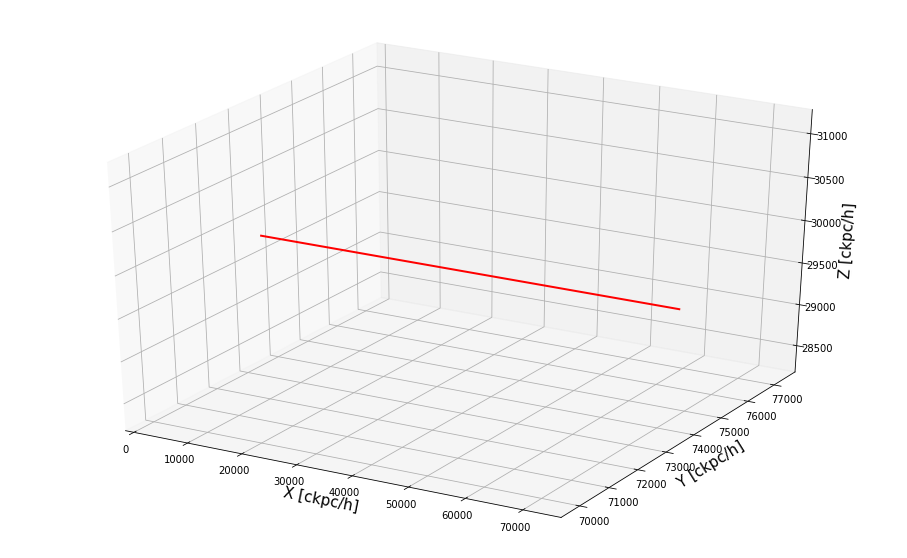

In [7]:
## randomly select cell as pipe starting points

#initialise
ncells = data['Coordinates'].shape[0]
print('Number of cells in snapshot {0} is {1}'.format(snap_number,ncells))

pipe_width = 200 #By following zhang+20 definition, sides will be 200ckpc/h in length
print('Pipe width will be {0} ckpc/h'.format(pipe_width))

nbins=10000 #number of bins along a single line of sight
print('There will be {0} bins on each sightline'.format(nbins))

protonmass = c.m_p.to('kg')
print('Proton mass is {0}'.format(protonmass))

hmassfrac = 3./4.
print('Chosen H mass fraction is {0}. Check whether this is correct'.format(hmassfrac))

#initialise figure
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111,projection='3d')
ax.set_xlim(0,header['BoxSize'])
#ax.set_ylim(0,header['BoxSize'])
ax.set_xlabel('X [ckpc/h]',fontsize=15)
ax.set_ylabel('Y [ckpc/h]',fontsize=15)
ax.set_zlabel('Z [ckpc/h]',fontsize=15)

#ax.set_zlim(0,header['BoxSize'])

for i in range(npipes): #for each desired pipe
    
    pipe_number = i
    print('Creating pipe {0}'.format(pipe_number))

    
    #define los coordinates at start of pipe.
    #x will be zero, y and z will be random
    #units default = ckpc/h (compare box size to https://www.tng-project.org/about/)
    
    pipe_start_coords = np.array([0,
                         np.random.uniform(0,header['BoxSize'],1)[0],
                         np.random.uniform(0,header['BoxSize'],1)[0]])
    print('Random start cell coordinates: {0}'.format(pipe_start_coords))
    
    #define coordinates at end of pipe.
    #By Zhang+20 definition of following x-axis,
    #x will be length of simulation,y and z will be same as start coords
    
    pipe_end_coords = pipe_start_coords+np.array([header['BoxSize'],0,0])
    print('Pipe end cell coordinates: {0}'.format(pipe_end_coords))

    
    #plot the line of sight
    
    los_toplot=list(zip(pipe_start_coords,pipe_end_coords))
    print(los_toplot)
    ax.plot(los_toplot[0],
            los_toplot[1],
            los_toplot[2],
            color='r',lw=2,label='LoS')
    
    #construct pipe corners.  
    #Add and subtract half of pipe length from y and z coords for y and z boundaries
    #code adapted from https://stackoverflow.com/questions/33540109/plot-surfaces-on-a-cube
    
    c1s = pipe_start_coords + np.array([0,pipe_width/2,pipe_width/2]) #start corner 1
    c2s = pipe_start_coords + np.array([0,-pipe_width/2,-pipe_width/2]) #start corner 2
    c3s = pipe_start_coords + np.array([0,pipe_width/2,-pipe_width/2]) #start corner 3
    c4s = pipe_start_coords + np.array([0,-pipe_width/2,pipe_width/2]) #start corner 4
    
    c1e = pipe_end_coords + np.array([0,pipe_width/2,pipe_width/2]) #end corner 1
    c2e = pipe_end_coords + np.array([0,-pipe_width/2,-pipe_width/2]) #end corner 2
    c3e = pipe_end_coords + np.array([0,pipe_width/2,-pipe_width/2]) #end corner 3
    c4e = pipe_end_coords + np.array([0,-pipe_width/2,pipe_width/2]) #end corner 4
    
    corners = np.array([c1s,c2s,c3s,c4s,c1e,c2e,c3e,c4e])
    
    #construct pipe edges.  

    line1 = list(zip(c1s,c1e))
    line2 = list(zip(c2s,c2e))
    line3 = list(zip(c3s,c3e))
    line4 = list(zip(c4s,c4e))
    line5 = list(zip(c1s,c3s))
    line6 = list(zip(c3s,c2s))
    line7 = list(zip(c2s,c4s))
    line8 = list(zip(c4s,c1s))
    line9 = list(zip(c1e,c3e))
    line10 = list(zip(c3e,c2e))
    line11 = list(zip(c2e,c4e))
    line12 = list(zip(c4e,c1e))
    
    lines_todraw = np.array([line1,line2,line3,line4,line5,line6,line7,line8,line9,line10,line11,line12])
    

    #plot pipe
    for i in range(len(lines)):
        if i==0:
            ax.plot(lines_todraw[i][0],
                    lines_todraw[i][1],
                    lines_todraw[i][2],
                    color='gray',alpha=0.8,label='Pipe boundaries')
        else:
            ax.plot(lines_todraw[i][0],
                    lines_todraw[i][1],
                    lines_todraw[i][2],
                    color='gray',alpha=0.8)

    ########################
    #get cells in this pipe#
    ########################
    #adapted from https://stackoverflow.com/questions/42352622/finding-points-within-a-bounding-box-with-numpy
    #I think this is right but if I get any strange results, double check the theory
    
    yz_pts = data['Coordinates'][:,[1,2]] #all y and z coords
    print('All y and z values: {0}'.format(yz))

    ur = c1s[1:] #upper right of pipe start (y and z only)
    ll = c2e[1:] #lower left of pipe end (y and z only)
    print('Upper right: {0}'.format(ur))
    print('Lower left: {0}'.format(ll))

    inidx = np.all((ll <= yz_pts) & (yz_pts <= ur), axis=1) #indexes of cells in pipe
    
    ###########################
    #get data of cells in pipe#
    ###########################
    
    pipe_cell_coords = data['Coordinates'][inidx]       #coordinates [ckpc/h]
    pipe_cell_dens   = data['Density'][inidx]           #densities [(1e10Msun/h)/(ckpc/h)**3]
    pipe_cell_elab   = data['ElectronAbundance'][inidx] #electron abundance [-]
    pipe_cell_sfr    = data['StarFormationRate'][inidx] #star formation rate [Msun/yr]
    
    print('{0} cells in this pipe'.format(data['Coordinates'][inidx].shape[0]))

    #plot locations of these cells
    ax.scatter3D(pipe_cell_coords[:,0],
                 pipe_cell_coords[:,1],
                 pipe_cell_coords[:,2],
                 label='Cells',s=60)
    
    
    ############################################################
    #For pure Zhang+20 method, exclude all star forming regions#
    ############################################################
    
    pipe_cell_coords_z = pipe_cell_coords[np.where(pipe_cell_sfr==0)]
    pipe_cell_dens_z = pipe_cell_dens[np.where(pipe_cell_sfr==0)]
    pipe_cell_elab_z = pipe_cell_elab[np.where(pipe_cell_sfr==0)]
    pipe_cell_sfr_z = pipe_cell_sfr[np.where(pipe_cell_sfr==0)]
    
    print('sum for star forming check: {0}'.format(pipe_cell_sfr_z.sum()))
    
    #plot locations of these cells
    ax.scatter3D(pipe_cell_coords_z[:,0],
                 pipe_cell_coords_z[:,1],
                 pipe_cell_coords_z[:,2],
                 label='Non-SFR Cells',s=50,color='y',marker='*')
    ###############################################
    #divide pipe into 10,000 bins along the x-axis#
    ###############################################
    #Question: why 10,000 bins given there are so few particles in the pipe?
    
    pipe_x_bins = np.linspace(pipe_start_coords[0],pipe_end_coords[0],nbins)
    print('Pipe x-axis bin coordinates: {0} ckpc/h'.format(pipe_x_bins))
    
    #######################################
    #get coordinates of center of each bin#
    #######################################
    
    pipe_bin_coords = np.array([[i,pipe_start_coords[1],pipe_start_coords[2]]for i in pipe_x_bins])
    print('Pipe x-bin_coords: {0}'.format(pipe_bin_coords))
    
    #plot locations of these bins
    ax.scatter3D(pipe_bin_coords[:,0],
             pipe_bin_coords[:,1],
             pipe_bin_coords[:,2],
             label='Bins',color='r',alpha=0.2)
    
    ###############################################################
    #for each bin, find distance between it and every cell in pipe#
    #find the one with miniimum distance                          #
    #this will be the cell in the los                             #
    #do for zhang (excluding sfr) and non-zhang (including sfr)   #
    ###############################################################
    
    ###########
    #non-zhang#
    ###########
    
    #initialise empty array to hold indices of closest particle to each bin
    nearest_idxs = []
    
    for i in range(len(pipe_bin_coords)): #loop over bins
        coords = pipe_bin_coords[i] #get bin coordinates
        distarr = np.sqrt(np.sum(((pipe_cell_coords[:]-coords)**2),axis=1)) #create array of distances from cells
        nearest = np.argmin(distarr) #find nearest cell to bin
        nearest_idxs.append(nearest) #append to array
        
    nearest_idxs = np.array(nearest_idxs) #convert to numpy array
    nearest_idxs_unique = np.unique(nearest_idxs) #some cells are the closest to multiple bins. Get uniques.
    
    ##############
    #zhang method#
    ##############
    
    #initialise empty array to hold indices of closest particle to each bin
    nearest_idxs_z = []
    
    for i in range(len(pipe_bin_coords)): #loop over bins
        coords = pipe_bin_coords[i] #get bin coordinates
        distarr = np.sqrt(np.sum(((pipe_cell_coords_z[:]-coords)**2),axis=1)) #create array of distances from cells
        nearest = np.argmin(distarr) #find nearest cell to bin
        nearest_idxs_z.append(nearest) #append to array
        
    nearest_idxs_z = np.array(nearest_idxs_z) #convert to numpy array
    nearest_idxs_unique_z = np.unique(nearest_idxs_z) #some cells are the closest to multiple bins. Get uniques.
    
    print('Nearest {0} particle ids: {1}'.format(np.shape(nearest_idxs),nearest_idxs))
    print('Of these, {0} are unique: {1}'.format(np.shape(nearest_idxs_unique),nearest_idxs_unique))
    
    #################################
    #extract data from nearest cells#
    #################################
    
    ###########
    #non-zhang#
    ###########
    
    pipe_nearest_coords = np.array(pipe_cell_coords[nearest_idxs]) #coordinates [ckpc/h]
    pipe_nearest_dens   = np.array(pipe_cell_dens[nearest_idxs])   #densities [(1e10Msun/h)/(ckpc/h)**3]
    pipe_nearest_elab   = np.array(pipe_cell_elab[nearest_idxs])   #electron abundance [-]
    pipe_nearest_sfr    = np.array(pipe_cell_sfr[nearest_idxs])    #star formation rate [Msun/yr]
    
    #######
    #zhang#
    #######
    pipe_nearest_coords_z = np.array(pipe_cell_coords_z[nearest_idxs_z]) #coordinates [ckpc/h]
    pipe_nearest_dens_z   = np.array(pipe_cell_dens_z[nearest_idxs_z])   #densities [(1e10Msun/h)/(ckpc/h)**3]
    pipe_nearest_elab_z   = np.array(pipe_cell_elab_z[nearest_idxs_z])   #electron abundance [-]
    pipe_nearest_sfr_z    = np.array(pipe_cell_sfr_z[nearest_idxs_z])    #star formation rate [Msun/yr]
    
    #mark locations of nearest cells to bins on plot
    ax.scatter3D(pipe_nearest_coords[:,0],
             pipe_nearest_coords[:,1],
             pipe_nearest_coords[:,2],
             label='Nearest',color='k',marker='x',s=50)
    
    ax.scatter3D(pipe_nearest_coords_z[:,0],
             pipe_nearest_coords_z[:,1],
             pipe_nearest_coords_z[:,2],
             label='Nearest non SFR',color='C',marker='+',s=50,alpha=0.5)

    ###############################################
    #convert density to si units using artale code#
    ###############################################
    pipe_nearest_dens_si = TNG_Dens2SI_astropy(pipe_nearest_dens)    
    pipe_nearest_dens_z_si = TNG_Dens2SI_astropy(pipe_nearest_dens_z)    

    ##########################################
    #get electron density at each of the bins#
    ##########################################
    
    #follow zhang+20 equation exactly as native units of TNG are
    #comoving
    
    #############################################################
    #Zhang: pne = (ElAb)*hmasssfrac*(Dens/protonmass)*((1+z)**3)#
    #use data which excludes SFRs                               #
    #############################################################
    pipe_nearest_pne_z = (pipe_nearest_elab_z)*hmassfrac*(pipe_nearest_dens_z_si/protonmass)*((1+header['Redshift'])**3)
    print('pnes are: {0}'.format(pipe_nearest_pne_z))

    ######################################################################
    #Non-zhang: pne = (ElAb*Warm)*hmasssfrac*(Dens/protonmass)*((1+z)**3)#
    #use all data (sfr included) and warm mass fraction                  #
    ######################################################################    
    
    ##################################
    #average these electron densities#
    ##################################
    
    #Zhang method
    pipe_average_pne_z = np.mean(pipe_nearest_pne_z)
    print('Average pne is: {0}'.format(pipe_average_pne_z))
    
    #calculate dDM/dz for this pipe.
    
    #outer bit of eq 7
    outer=c.c/cosmosource.H(0)
    print(outer)

    #E(z) according to paper eq 5
    Ez = np.sqrt((0.3089*((1+header['Redshift'])**(3)))+(0.6911))
    print(Ez)
    
    #denominator of eq 7
    denominator = ((1+header['Redshift'])**(2))*Ez

    edens_z = pipe_average_pne_z
    
    ddmdz_z = outer*edens_z/denominator
    print('dDM/dz = {0}'.format(ddmdz_z.to('pc*cm**(-3)')))
    
    ax.set_title('Snapshot {0}, dDM/dz = {1:.2f}'.format(snap_number,ddmdz_z.to('pc*cm**(-3)')),fontsize=15)

    
    
plt.legend(fontsize=15)

# create multiple of these for each snapshot and store

In [331]:
snaps_to_process = [13,11,8,6,4,3,2]#[99,91,84,78,72,67,59,50,40,33,25,21,17]#,[13,11,8,6,4,3,2]
pipes_per_snap = 5125

pipe_width = 200 #By following zhang+20 definition, sides will be 200ckpc/h in length
print('Pipe width will be {0} ckpc/h'.format(pipe_width))

nbins=10000 #number of bins along a single line of sight
print('There will be {0} bins on each sightline'.format(nbins))

protonmass = c.m_p.to('kg')
print('Proton mass is {0}'.format(protonmass))

hmassfrac = 3./4.
print('Chosen H mass fraction is {0}. Check whether this is correct'.format(hmassfrac))

for snapshot_toprocess in range(len(snaps_to_process)):
    
    ############
    #initialise#
    ############
    
    npipes      = pipes_per_snap  #number of pipes to create
    snap_number = snaps_to_process[snapshot_toprocess] #snapshot number for test
    print('Currently processing snapshot: {0}'.format(snap_number))

    #load data
    basePath = '/ptmp/cwalker/Illustris_FRB_Project/TNG_copies/virgo/simulations/IllustrisTNG/TNG100-3/output/'
    data = il.snapshot.loadSubset(basePath, snap_number, 'gas', fields=['Density',
                                                                        'ElectronAbundance',
                                                                        'StarFormationRate',
                                                                        'Coordinates'])

    #load header
    header = il.groupcat.loadHeader(basePath,snap_number)
    print('Header for snap = {0}'.format(header))
    
    ncells = data['Coordinates'].shape[0]
    print('Number of cells in snapshot {0} is {1}'.format(snap_number,ncells))
    
    dDMdz_output = [] #array to hold dDMdz values
    
    #########################
    #create pipes, get dDMdz#
    #########################
    
    for i in range(npipes): #for each desired pipe

        pipe_number = i
        print('Creating pipe {0}'.format(pipe_number))


        #define los coordinates at start of pipe.
        #x will be zero, y and z will be random
        #units default = ckpc/h (compare box size to https://www.tng-project.org/about/)

        pipe_start_coords = np.array([0,
                             np.random.uniform(0,header['BoxSize'],1)[0],
                             np.random.uniform(0,header['BoxSize'],1)[0]])
        #print('Random start cell coordinates: {0}'.format(pipe_start_coords))

        #define coordinates at end of pipe.
        #By Zhang+20 definition of following x-axis,
        #x will be length of simulation,y and z will be same as start coords

        pipe_end_coords = pipe_start_coords+np.array([header['BoxSize'],0,0])
        #print('Pipe end cell coordinates: {0}'.format(pipe_end_coords))


        #plot the line of sight

        los_toplot=list(zip(pipe_start_coords,pipe_end_coords))
        #print(los_toplot)
        #ax.plot(los_toplot[0],
        #        los_toplot[1],
        #        los_toplot[2],
        #        color='r',lw=2,label='LoS')

        #construct pipe corners.  
        #Add and subtract half of pipe length from y and z coords for y and z boundaries
        #code adapted from https://stackoverflow.com/questions/33540109/plot-surfaces-on-a-cube

        c1s = pipe_start_coords + np.array([0,pipe_width/2,pipe_width/2]) #start corner 1
        c2s = pipe_start_coords + np.array([0,-pipe_width/2,-pipe_width/2]) #start corner 2
        c3s = pipe_start_coords + np.array([0,pipe_width/2,-pipe_width/2]) #start corner 3
        c4s = pipe_start_coords + np.array([0,-pipe_width/2,pipe_width/2]) #start corner 4

        c1e = pipe_end_coords + np.array([0,pipe_width/2,pipe_width/2]) #end corner 1
        c2e = pipe_end_coords + np.array([0,-pipe_width/2,-pipe_width/2]) #end corner 2
        c3e = pipe_end_coords + np.array([0,pipe_width/2,-pipe_width/2]) #end corner 3
        c4e = pipe_end_coords + np.array([0,-pipe_width/2,pipe_width/2]) #end corner 4

        corners = np.array([c1s,c2s,c3s,c4s,c1e,c2e,c3e,c4e])

        #construct pipe edges.  

        line1 = list(zip(c1s,c1e))
        line2 = list(zip(c2s,c2e))
        line3 = list(zip(c3s,c3e))
        line4 = list(zip(c4s,c4e))
        line5 = list(zip(c1s,c3s))
        line6 = list(zip(c3s,c2s))
        line7 = list(zip(c2s,c4s))
        line8 = list(zip(c4s,c1s))
        line9 = list(zip(c1e,c3e))
        line10 = list(zip(c3e,c2e))
        line11 = list(zip(c2e,c4e))
        line12 = list(zip(c4e,c1e))

        lines_todraw = np.array([line1,line2,line3,line4,line5,line6,line7,line8,line9,line10,line11,line12])


        #plot pipe
        #for i in range(len(lines)):
        #    if i==0:
        #        ax.plot(lines_todraw[i][0],
        #                lines_todraw[i][1],
        #                lines_todraw[i][2],
        #                color='gray',alpha=0.8,label='Pipe boundaries')
        #    else:
       #         ax.plot(lines_todraw[i][0],
       #                 lines_todraw[i][1],
       #                 lines_todraw[i][2],
       #                 color='gray',alpha=0.8)

        ########################
        #get cells in this pipe#
        ########################
        #adapted from https://stackoverflow.com/questions/42352622/finding-points-within-a-bounding-box-with-numpy
        #I think this is right but if I get any strange results, double check the theory

        yz_pts = data['Coordinates'][:,[1,2]] #all y and z coords
        #print('All y and z values: {0}'.format(yz))

        ur = c1s[1:] #upper right of pipe start (y and z only)
        ll = c2e[1:] #lower left of pipe end (y and z only)
        #print('Upper right: {0}'.format(ur))
        #print('Lower left: {0}'.format(ll))

        inidx = np.all((ll <= yz_pts) & (yz_pts <= ur), axis=1) #indexes of cells in pipe

        ###########################
        #get data of cells in pipe#
        ###########################

        pipe_cell_coords = data['Coordinates'][inidx]       #coordinates [ckpc/h]
        pipe_cell_dens   = data['Density'][inidx]           #densities [(1e10Msun/h)/(ckpc/h)**3]
        pipe_cell_elab   = data['ElectronAbundance'][inidx] #electron abundance [-]
        pipe_cell_sfr    = data['StarFormationRate'][inidx] #star formation rate [Msun/yr]

        #print('{0} cells in this pipe'.format(data['Coordinates'][inidx].shape[0]))

        #plot locations of these cells
        #ax.scatter3D(pipe_cell_coords[:,0],
        #             pipe_cell_coords[:,1],
        #             pipe_cell_coords[:,2],
        #             label='Cells',s=60)


        ############################################################
        #For pure Zhang+20 method, exclude all star forming regions#
        ############################################################

        pipe_cell_coords_z = pipe_cell_coords[np.where(pipe_cell_sfr==0)]
        pipe_cell_dens_z = pipe_cell_dens[np.where(pipe_cell_sfr==0)]
        pipe_cell_elab_z = pipe_cell_elab[np.where(pipe_cell_sfr==0)]
        pipe_cell_sfr_z = pipe_cell_sfr[np.where(pipe_cell_sfr==0)]

        #print('sum for star forming check: {0}'.format(pipe_cell_sfr_z.sum()))

        #plot locations of these cells
        #ax.scatter3D(pipe_cell_coords_z[:,0],
        #             pipe_cell_coords_z[:,1],
        #             pipe_cell_coords_z[:,2],
        #             label='Non-SFR Cells',s=50,color='y',marker='*')
        ###############################################
        #divide pipe into 10,000 bins along the x-axis#
        ###############################################
        #Question: why 10,000 bins given there are so few particles in the pipe?

        pipe_x_bins = np.linspace(pipe_start_coords[0],pipe_end_coords[0],nbins)
        #print('Pipe x-axis bin coordinates: {0} ckpc/h'.format(pipe_x_bins))

        #######################################
        #get coordinates of center of each bin#
        #######################################

        pipe_bin_coords = np.array([[i,pipe_start_coords[1],pipe_start_coords[2]]for i in pipe_x_bins])
        #print('Pipe x-bin_coords: {0}'.format(pipe_bin_coords))

        #plot locations of these bins
        #ax.scatter3D(pipe_bin_coords[:,0],
        #         pipe_bin_coords[:,1],
        #         pipe_bin_coords[:,2],
        #         label='Bins',color='r',alpha=0.2)

        ###############################################################
        #for each bin, find distance between it and every cell in pipe#
        #find the one with miniimum distance                          #
        #this will be the cell in the los                             #
        #do for zhang (excluding sfr) and non-zhang (including sfr)   #
        ###############################################################

        ###########
        #non-zhang#
        ###########

        #initialise empty array to hold indices of closest particle to each bin
        nearest_idxs = []

        for i in range(len(pipe_bin_coords)): #loop over bins
            coords = pipe_bin_coords[i] #get bin coordinates
            distarr = np.sqrt(np.sum(((pipe_cell_coords[:]-coords)**2),axis=1)) #create array of distances from cells
            nearest = np.argmin(distarr) #find nearest cell to bin
            nearest_idxs.append(nearest) #append to array

        nearest_idxs = np.array(nearest_idxs) #convert to numpy array
        nearest_idxs_unique = np.unique(nearest_idxs) #some cells are the closest to multiple bins. Get uniques.

        ##############
        #zhang method#
        ##############

        #initialise empty array to hold indices of closest particle to each bin
        nearest_idxs_z = []

        for i in range(len(pipe_bin_coords)): #loop over bins
            coords = pipe_bin_coords[i] #get bin coordinates
            distarr = np.sqrt(np.sum(((pipe_cell_coords_z[:]-coords)**2),axis=1)) #create array of distances from cells
            nearest = np.argmin(distarr) #find nearest cell to bin
            nearest_idxs_z.append(nearest) #append to array

        nearest_idxs_z = np.array(nearest_idxs_z) #convert to numpy array
        nearest_idxs_unique_z = np.unique(nearest_idxs_z) #some cells are the closest to multiple bins. Get uniques.

        #print('Nearest {0} particle ids: {1}'.format(np.shape(nearest_idxs),nearest_idxs))
        #print('Of these, {0} are unique: {1}'.format(np.shape(nearest_idxs_unique),nearest_idxs_unique))

        #################################
        #extract data from nearest cells#
        #################################

        ###########
        #non-zhang#
        ###########

        pipe_nearest_coords = np.array(pipe_cell_coords[nearest_idxs]) #coordinates [ckpc/h]
        pipe_nearest_dens   = np.array(pipe_cell_dens[nearest_idxs])   #densities [(1e10Msun/h)/(ckpc/h)**3]
        pipe_nearest_elab   = np.array(pipe_cell_elab[nearest_idxs])   #electron abundance [-]
        pipe_nearest_sfr    = np.array(pipe_cell_sfr[nearest_idxs])    #star formation rate [Msun/yr]

        #######
        #zhang#
        #######
        pipe_nearest_coords_z = np.array(pipe_cell_coords_z[nearest_idxs_z]) #coordinates [ckpc/h]
        pipe_nearest_dens_z   = np.array(pipe_cell_dens_z[nearest_idxs_z])   #densities [(1e10Msun/h)/(ckpc/h)**3]
        pipe_nearest_elab_z   = np.array(pipe_cell_elab_z[nearest_idxs_z])   #electron abundance [-]
        pipe_nearest_sfr_z    = np.array(pipe_cell_sfr_z[nearest_idxs_z])    #star formation rate [Msun/yr]

        #mark locations of nearest cells to bins on plot
        #ax.scatter3D(pipe_nearest_coords[:,0],
        #         pipe_nearest_coords[:,1],
        #         pipe_nearest_coords[:,2],
        #         label='Nearest',color='k',marker='x',s=50)

        #ax.scatter3D(pipe_nearest_coords_z[:,0],
        #         pipe_nearest_coords_z[:,1],
        #         pipe_nearest_coords_z[:,2],
        #         label='Nearest non SFR',color='C',marker='+',s=50,alpha=0.5)

        ###############################################
        #convert density to si units using artale code#
        ###############################################
        pipe_nearest_dens_si = TNG_Dens2SI_astropy(pipe_nearest_dens)    
        pipe_nearest_dens_z_si = TNG_Dens2SI_astropy(pipe_nearest_dens_z)    

        ##########################################
        #get electron density at each of the bins#
        ##########################################

        #follow zhang+20 equation exactly as native units of TNG are
        #comoving

        #############################################################
        #Zhang: pne = (ElAb)*hmasssfrac*(Dens/protonmass)*((1+z)**3)#
        #use data which excludes SFRs                               #
        #############################################################
        pipe_nearest_pne_z = (pipe_nearest_elab_z)*hmassfrac*(pipe_nearest_dens_z_si/protonmass)*((1+header['Redshift'])**3)
        #print('pnes are: {0}'.format(pipe_nearest_pne_z))

        ######################################################################
        #Non-zhang: pne = (ElAb*Warm)*hmasssfrac*(Dens/protonmass)*((1+z)**3)#
        #use all data (sfr included) and warm mass fraction                  #
        ######################################################################    

        ##################################
        #average these electron densities#
        ##################################

        #Zhang method
        pipe_average_pne_z = np.mean(pipe_nearest_pne_z)
        #print('Average pne is: {0}'.format(pipe_average_pne_z))

        #calculate dDM/dz for this pipe.

        #outer bit of eq 7
        outer=c.c/cosmosource.H(0)
        #print(outer)

        #E(z) according to paper eq 5
        Ez = np.sqrt((0.3089*((1+header['Redshift'])**(3)))+(0.6911))
        #print(Ez)

        #denominator of eq 7
        denominator = ((1+header['Redshift'])**(2))*Ez

        edens_z = pipe_average_pne_z

        ddmdz_z = outer*edens_z/denominator
        print('dDM/dz = {0}'.format(ddmdz_z.to('pc*cm**(-3)')))
        dDMdz_output.append(ddmdz_z.to('pc*cm**(-3)').value) #append to array in [pc/cc]

        #ax.set_title('Snapshot {0}, dDM/dz = {1:.2f}'.format(snap_number,ddmdz_z.to('pc*cm**(-3)')),fontsize=15)


    
    #plt.legend(fontsize=15)
    print(dDMdz_output)
    #np.save('dDMdz_arr_for_sn_{0}.npy'.format(snap_number),dDMdz_output)








Pipe width will be 200 ckpc/h
There will be 10000 bins on each sightline
Proton mass is 1.67262192369e-27 kg
Chosen H mass fraction is 0.75. Check whether this is correct
Currently processing snapshot: 13


OSError: Unable to open file (unable to open file: name = '/ptmp/cwalker/Illustris_FRB_Project/TNG_copies/virgo/simulations/IllustrisTNG/TNG100-3/output//snapdir_013/snap_013.0.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [320]:
test = np.load('dDMdz_arr_for_sn_99.npy')
print(test)

[13134.33896049  4287.21340889   512.03970808]


In [3]:
#Step: define pipe coordinates



In [6]:
#Step: load pipe

#gas = il.snapshot.loadSubset(basePath, 99, 'gas', fields=['Masses','Coordinates'])

In [19]:
rand.choice?

In [40]:
np.random.rand?

In [190]:
testarr = np.array([[1,1,1],[40,12,6],[9,9,4],[0,4,3]])
testcoord = np.array([-1,2,-5])
print(testarr[:]-testcoord)
print((testarr[:]-testcoord)**2)
print(np.sum(((testarr[:]-testcoord)**2),axis=1))
print(np.sqrt(np.sum(((testarr[:]-testcoord)**2),axis=1)))

[[ 2 -1  6]
 [41 10 11]
 [10  7  9]
 [ 1  2  8]]
[[   4    1   36]
 [1681  100  121]
 [ 100   49   81]
 [   1    4   64]]
[  41 1902  230   69]
[ 6.40312424 43.61192497 15.16575089  8.30662386]
